In [1]:
# imported some basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# imported data

data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
data.info

<bound method DataFrame.info of        Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/

In [6]:
# assigning dataframe to 'df' and droping unnecessary columns 
df = data.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Real Face', 'Jersey Number', 'Loaned From', 'Contract Valid Until', 'Release Clause'], axis=1)

In [7]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
# Created different dataframe for feature selection

features = df[['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
'GKKicking', 'GKPositioning', 'GKReflexes', 'Position']]

In [9]:
# cheching for null values

features.isnull().sum()

Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
Position           60
dtype: int64

In [10]:
# droping null values

features.dropna(inplace=True)

In [11]:
features.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM


In [12]:
# checking how many unique positions we have in dataset

features.Position.nunique()

27

In [13]:
# function which changes position from goolkeeper to 1, defender to 2, midfielder to 3, striker to 4.

def simplePosition(col):
    if (col == 'GK'):
        return 1
    elif ((col == 'RB') | (col == 'LB') | (col == 'CB') | (col == 'LCB') | (col == 'RCB') | (col == 'RWB') | (col == 'LWB') ):
        return 2
    elif ((col == 'LDM') | (col == 'CDM') | (col == 'RDM') | (col == 'LM') | (col == 'LCM') | (col == 'CM') | (col == 'RCM') | (col == 'RM') | (col == 'LAM') | (col == 'CAM') | (col == 'RAM') | (col == 'LW') | (col == 'RW')):
        return 3
    elif ((col == 'RS') | (col == 'ST') | (col == 'LS') | (col == 'CF') | (col == 'LF') | (col == 'RF')):
        return 4
    else:
        return 'error'

In [14]:
# applying that funcion to position column

features["Position"] = features.Position.apply(simplePosition)

In [15]:
features.Position.unique()

array([4, 3, 1, 2], dtype=int64)

In [16]:
features.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,4
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,4
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3


In [17]:
# IMPORTANT

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features.drop('Position', axis=1))
scaled_fetures = scaler.transform(features.drop('Position', axis=1))
df_features = pd.DataFrame(scaled_fetures, columns=features.columns[:-1])

In [18]:
df_features

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1.865719,2.532391,1.018293,2.130190,2.434969,2.201010,2.491028,2.925359,2.236808,2.255005,...,1.684657,3.265669,-0.717896,-0.909470,-0.923850,-0.599889,-0.318983,-0.074713,-0.140266,-0.485159
1,1.865719,2.481180,2.111424,1.517765,2.491481,1.725114,1.838695,1.895584,1.584271,2.135138,...,2.321491,3.178232,-0.969153,-0.770985,-1.064778,-0.543386,-0.318983,-0.074713,-0.140266,-0.318094
2,1.593443,2.122700,0.558028,1.721906,2.321945,2.148132,2.219223,2.524891,1.649524,2.195072,...,2.066757,3.090795,-1.019405,-1.094116,-0.595016,-0.430379,-0.437259,-0.074713,-0.081569,-0.318094
3,-1.782774,-1.666942,-1.800833,-0.591700,-1.690394,-1.976298,-1.422972,-1.365369,-0.112327,-0.981399,...,-0.544262,0.817436,-1.622423,-1.232601,-1.534540,4.146377,4.057254,4.287959,4.203333,4.304052
4,2.355815,1.866643,0.155296,2.266284,2.208922,1.619359,2.056139,2.296052,2.497823,1.955338,...,1.939390,2.566174,1.040907,0.475378,0.250555,-0.091360,-0.200706,-0.680640,-0.375055,-0.206717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,-0.857037,-0.386658,-0.707702,-0.659747,-1.012252,-0.707242,-0.933722,-0.507223,-0.503849,-0.921466,...,-0.353212,-1.193612,-0.366135,0.013762,0.062650,-0.373876,-0.200706,-0.559455,-0.492450,-0.429471
18143,-1.456043,0.330302,-0.017304,-1.068031,-0.390622,-0.865874,-0.825000,-1.308159,-1.808925,-1.101266,...,-0.353212,-1.455922,-1.270662,-1.509571,-1.252683,-0.373876,-0.437259,-0.438269,-0.668542,-0.262405
18144,-1.347133,-0.284235,-0.362503,-1.408267,-0.277598,-0.548610,-0.498833,-0.907691,-1.613163,-0.861532,...,0.410989,-1.543359,-0.768147,-1.601894,-1.628493,-0.599889,-0.673813,-0.377677,-0.609844,-0.206717
18145,-0.312486,0.227879,-0.765235,-1.136078,-0.164575,-0.231347,-0.716277,-0.621643,-1.352148,-0.382065,...,0.092572,-1.106175,-1.371165,-1.047955,-0.876874,-0.147863,-0.614674,-0.135306,-0.492450,-0.429471


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# assign scaled features dataframe and position column to the varibles

feat = df_features
targ = features.Position

In [21]:
# spliting data into train and test

xTrain, xTest, yTrain, yTest = train_test_split(feat, targ, test_size=0.2, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1)

# Code Evaluation

In [25]:
y_pred_test = knn.predict(xTest)

In [26]:
y_pred_train = knn.predict(xTrain)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# confusion matrix and classification report explains how good our classification algorith performs
print(confusion_matrix(yTrain, y_pred_train))
print('\n')
print(classification_report(yTrain, y_pred_train))
confMatrix_train = confusion_matrix(yTrain, y_pred_train)

[[1618    0    0    0]
 [   0 4709    0    0]
 [   0    0 6048    0]
 [   0    0    0 2142]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1618
           2       1.00      1.00      1.00      4709
           3       1.00      1.00      1.00      6048
           4       1.00      1.00      1.00      2142

    accuracy                           1.00     14517
   macro avg       1.00      1.00      1.00     14517
weighted avg       1.00      1.00      1.00     14517



In [29]:
print(confusion_matrix(yTest, y_pred_test))
print('\n')
print(classification_report(yTest, y_pred_test))
confMatrix_test = confusion_matrix(yTest, y_pred_test)

[[ 407    0    0    0]
 [   0 1007  148    2]
 [   0  139 1290  112]
 [   0    2  109  414]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       407
           2       0.88      0.87      0.87      1157
           3       0.83      0.84      0.84      1541
           4       0.78      0.79      0.79       525

    accuracy                           0.86      3630
   macro avg       0.87      0.87      0.87      3630
weighted avg       0.86      0.86      0.86      3630



In [30]:
# this function plots good looking confusion matrix, accuracy and error rates

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

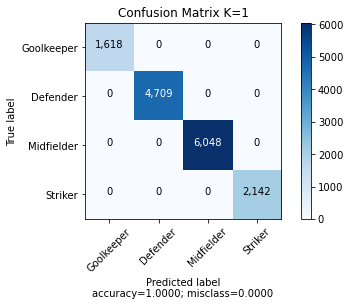

In [31]:
# here is same, but a bit better looking confusion matrix

plot_confusion_matrix(cm = confMatrix_train, normalize = False, 
target_names = ['Goolkeeper', 'Defender', 'Midfielder', 'Striker'],
title= "Confusion Matrix K=1")

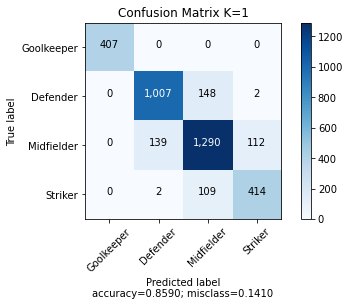

In [32]:
plot_confusion_matrix(cm = confMatrix_test, normalize = False, 
target_names = ['Goolkeeper', 'Defender', 'Midfielder', 'Striker'],
title= "Confusion Matrix K=1")

In [33]:
from sklearn import metrics
print(metrics.r2_score(yTest,y_pred_test))

0.8083387341723174


In [34]:
print(metrics.r2_score(yTrain,y_pred_train))

1.0


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(yTrain, knn.predict(xTrain))))
print("The test accuracy score is {:0.3f}".format(accuracy_score(yTest, knn.predict(xTest))))

The train accuracy score is 1.000
The test accuracy score is 0.859


In [37]:
print("The Mean Squared Error on the Train set is :\t{:0.1f}".format(metrics.mean_squared_error(yTrain, y_pred_train)))
print("The Mean Squared Error on the Test set is :\t{:0.1f}".format(metrics.mean_squared_error(yTest, y_pred_test)))

The Mean Squared Error on the Train set is :	0.0
The Mean Squared Error on the Test set is :	0.1
